In [9]:
import sys, os
sys.path.append(os.path.abspath(".."))

import numpy as np
import matplotlib.pylab as plt
from src.dataset import Dataset
from src.soft_dtw import SoftDTW
from src.softdtw_barycenter import softdtw_barycenter


FileNotFoundError: [Errno 2] No such file or directory

In [5]:
ds = Dataset("ECG200")
X_train, y_train, X_test, y_test = ds.load_dataset()
n_series = 10
X_subset, class_selected = ds.sample_random_class_series(X_train, y_train, n=n_series, seed=0)

print(f"Classe sélectionnée : {class_selected}")

Loading UCR dataset: ECG200
Classe sélectionnée : 1


/Users/ilan/Code/MVA/Geometry Data Analysis/src/soft_dtw.py:62: RuntimeWarning: overflow encountered in exp
  a = np.exp((R[i+1, j]   - R[i, j] - D[i,   j-1]) / gamma)
/Users/ilan/Code/MVA/Geometry Data Analysis/src/soft_dtw.py:64: RuntimeWarning: overflow encountered in exp
  c = np.exp((R[i+1, j+1] - R[i, j] - D[i,   j  ]) / gamma)
/Users/ilan/Code/MVA/Geometry Data Analysis/src/soft_dtw.py:67: RuntimeWarning: invalid value encountered in scalar multiply
  E[i+1, j] * a +
/Users/ilan/Code/MVA/Geometry Data Analysis/src/soft_dtw.py:69: RuntimeWarning: invalid value encountered in scalar multiply
  E[i+1, j+1] * c
/Users/ilan/Code/MVA/Geometry Data Analysis/src/soft_dtw.py:63: RuntimeWarning: overflow encountered in exp
  b = np.exp((R[i,   j+1] - R[i, j] - D[i-1, j  ]) / gamma)
/Users/ilan/Code/MVA/Geometry Data Analysis/src/soft_dtw.py:68: RuntimeWarning: invalid value encountered in scalar multiply
  E[i, j+1] * b +
/Users/ilan/Code/MVA/Geometry Data Analysis/src/soft_dtw.py:15: Run

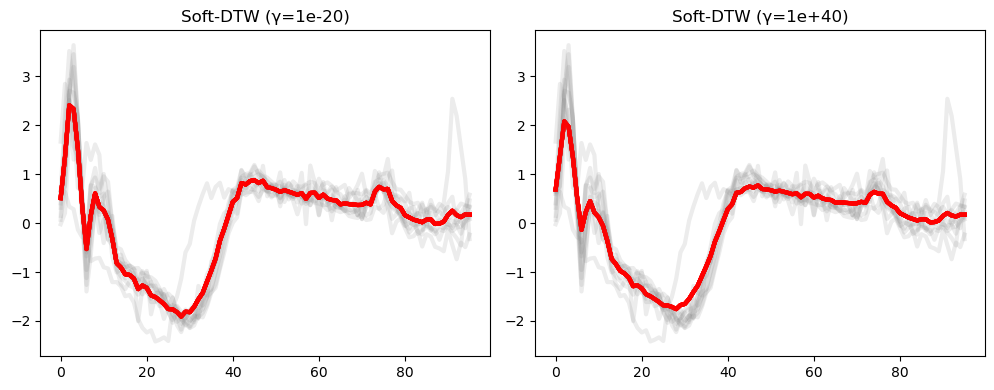

In [8]:
barycenter_init = np.mean(X_subset, axis=0)
plt.figure(figsize=(15, 4))
gammas = [1e-20, 1e40]
for i, gamma in enumerate(gammas, start=1):
    ax = plt.subplot(1, 3, i)
    for x in X_subset:
        ax.plot(x.ravel(), c="gray", linewidth=3, alpha=0.15)
        Z = softdtw_barycenter(X_subset, barycenter_init, gamma=gamma)
        ax.plot(Z.ravel(), c="red", linewidth=3, alpha=0.8)
        ax.set_title(f"Soft-DTW (γ={gamma})")

    plt.tight_layout()
plt.show()
    